In [1]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp

from pprint import pprint

DATA_PATH = 'D:\download'
transactions = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'consumption_mode': 'category',
        'ts': np.float64,
        'watched_time': np.uint64,
        'device_type': np.uint8,
        'device_manufacturer': np.uint8
    }
)



transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)


ratings = pd.read_csv(
    os.path.join(DATA_PATH, 'ratings.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64,
        'rating': np.uint8
    }
)


In [2]:
%%time
bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)
bookmarks.head()
from collections import Counter
catal=pd.read_json(os.path.join(DATA_PATH, 'catalogue.json'), orient='index') 

Wall time: 1.8 s


In [5]:
ratings.head()

,user_uid,element_uid,rating,ts
0,571252,1364,10,4.430517e+07
1,63140,3037,10,4.430514e+07
2,443817,4363,8,4.430514e+07
3,359870,1364,10,4.430506e+07
4,359870,3578,9,4.430506e+07


In [3]:
bookmarks.head()

,user_uid,element_uid,ts
0,301135,7185,4.430516e+07
1,301135,4083,4.430516e+07
2,301135,10158,4.430516e+07
3,301135,2693,4.430516e+07
4,301135,2181,4.430515e+07


In [6]:
transactions_exp.head()

,Unnamed: 0,element_uid,user_uid,watched_time,rating,duration,feature_1,feature_2,feature_3,feature_4,...,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,type_m,type_s,type_mm,longfilm,shortfilm
0,0,3336,5177,0.792963,9.0,90,4.166108e+07,0.739609,45,1.141929,...,0,0,0,0,1,1,0,0,0,0
1,1,3336,349202,0.609444,NaN,90,4.166108e+07,0.739609,45,1.141929,...,0,0,0,0,1,1,0,0,0,0
2,2,3336,117582,1.060556,NaN,90,4.166108e+07,0.739609,45,1.141929,...,0,0,0,0,1,1,0,0,0,0
3,3,3336,523833,0.804815,NaN,90,4.166108e+07,0.739609,45,1.141929,...,0,0,0,0,1,1,0,0,0,0
4,4,3336,571064,0.845926,NaN,90,4.166108e+07,0.739609,45,1.141929,...,0,0,0,0,1,1,0,0,0,0


In [7]:
transactions_exp.to_csv(os.path.join(DATA_PATH, 'transactions_exp.csv'))

In [10]:
Counter(transactions.device_type)

Counter({0: 7651772,
         3: 855860,
         5: 591265,
         4: 219254,
         1: 298108,
         6: 26740,
         2: 13})

In [11]:
Counter(transactions.device_manufacturer)

Counter({50: 4416390,
         11: 2258114,
         99: 1799240,
         31: 51498,
         67: 55007,
         90: 647198,
         85: 118445,
         76: 219254,
         94: 13187,
         41: 2538,
         82: 13886,
         52: 9832,
         20: 5838,
         0: 5078,
         38: 3132,
         2: 241,
         37: 1037,
         59: 1507,
         42: 1827,
         57: 213,
         62: 1273,
         97: 2928,
         40: 365,
         44: 724,
         78: 2416,
         80: 254,
         79: 238,
         86: 133,
         71: 22,
         5: 311,
         27: 192,
         26: 149,
         33: 231,
         30: 105,
         98: 301,
         4: 89,
         93: 27,
         73: 611,
         15: 770,
         12: 173,
         48: 81,
         32: 179,
         3: 40,
         39: 25,
         24: 109,
         95: 221,
         21: 306,
         43: 421,
         56: 43,
         89: 384,
         51: 359,
         87: 217,
         28: 665,
         55: 301,


In [9]:
catal.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie
10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie
100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie
1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie


In [36]:
len(pd.unique(transactions.device_manufacturer))

100

In [6]:
transactions=transactions.drop(['consumption_mode', 'ts', 'watched_time', 'device_type', 'device_manufacturer'], 1)

In [12]:
book_exp=pd.merge(transactions, bookmarks, on=['element_uid', 'user_uid'])

In [8]:
bookmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948216 entries, 0 to 948215
Data columns (total 3 columns):
user_uid       948216 non-null uint32
element_uid    948216 non-null uint16
ts             948216 non-null float64
dtypes: float64(1), uint16(1), uint32(1)
memory usage: 12.7 MB


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643012 entries, 0 to 9643011
Data columns (total 2 columns):
element_uid    uint16
user_uid       uint32
dtypes: uint16(1), uint32(1)
memory usage: 55.2 MB


In [23]:
book_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264722 entries, 0 to 264721
Data columns (total 3 columns):
element_uid    264722 non-null uint16
user_uid       264722 non-null uint32
seen           264722 non-null int64
dtypes: int64(1), uint16(1), uint32(1)
memory usage: 5.6 MB


In [16]:
book_exp=book_exp.drop(['ts'], 1)
book_exp['seen']=1
book_exp.head()

,element_uid,user_uid,seen
0,6857,498196,1
1,5961,525448,1
2,8578,270094,1
3,6235,344328,1
4,2694,345519,1


In [18]:
book_exp1=pd.merge(bookmarks, book_exp, how='left', on=['element_uid', 'user_uid'])

In [20]:
book_exp1=book_exp1.fillna(0)

In [22]:
Counter(book_exp1.seen)

Counter({0.0: 683494, 1.0: 264722})

In [24]:
book_exp2=book_exp1[book_exp1.seen == 0.0]

In [27]:
book_exp2=book_exp2.drop(['ts', 'seen'], 1)


In [28]:
book_exp3=book_exp2
book_exp3['rating']=8.0

In [29]:
book_exp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683494 entries, 0 to 948215
Data columns (total 3 columns):
user_uid       683494 non-null uint32
element_uid    683494 non-null uint16
rating         683494 non-null float64
dtypes: float64(1), uint16(1), uint32(1)
memory usage: 14.3 MB


In [30]:
book_exp3.to_csv(os.path.join(DATA_PATH, 'book_exp3.csv'))

In [34]:
len(pd.unique(catal.index))

10200

In [40]:
catal['element_uid']=catal.index

In [42]:
catal.head()

,attributes,availability,duration,feature_1,feature_2,feature_3,feature_4,feature_5,type,element_uid
0,"[31115, 6713, 10906, 31116, 31117, 270, 24431,...",[],80,2.912198e+07,0.575260,0,1.128332,0.654707,movie,0
1,"[2786, 385, 2799, 3730, 886, 7, 11700, 42, 20,...","[purchase, rent]",120,6.610431e+06,0.773224,3,1.112014,0.654707,movie,1
10,"[10511, 2752, 9076, 1373, 472, 7, 10512, 42, 4...",[],100,1.666610e+07,0.700997,0,1.130076,0.654707,movie,10
100,"[18441, 16300, 16580, 18770, 18771, 18643, 396...","[purchase, rent]",80,6.064739e+06,0.752751,4,0.953710,0.000000,movie,100
1000,"[1256, 441, 19806, 15224, 16708, 83, 336, 1980...",[],80,9.115019e+06,0.689883,0,1.128332,0.680410,movie,1000


In [44]:
transactions.head()

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer
0,3336,5177,S,4.430518e+07,4282,0,50
1,481,593316,S,4.430518e+07,2989,0,11
2,4128,262355,S,4.430518e+07,833,0,50
3,6272,74296,S,4.430518e+07,2530,0,99
4,5543,340623,P,4.430518e+07,6282,0,50


In [43]:
timetr=pd.merge(transactions, catal, on=['element_uid'])

In [45]:
timetr=timetr.drop(['consumption_mode', 'watched_time', 'watched_time', 'device_manufacturer', 'feature_2', 'feature_3','feature_4', 'feature_5', 'duration', 'attributes', 'availability'],1 )

In [47]:
timetr.head()
timetr=timetr.drop(['device_type','type'], 1)
timetr['ts-f1']=timetr['ts']-timetr['feature_1']

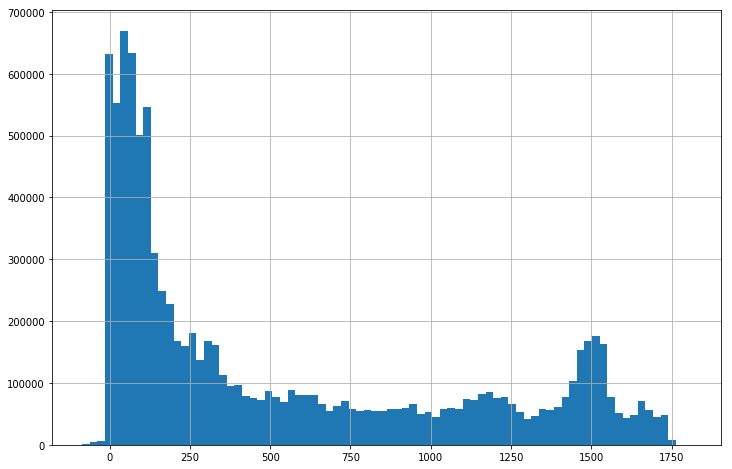

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

#plt.hist(catal['feature_3'][catal['type']== 'movie'], 40, color='blue')

plt.hist(timetr['ts-f1'], 80)

plt.grid()
plt.show()

In [69]:
timetr['ts-f1']=timetr['ts-f1']*(60*24*17)


In [71]:
timetr['minus']=timetr['ts-f1'].map(lambda x: 1 if x<0 else 0)


In [79]:
pd.unique(timetr[timetr.minus == 1].element_uid)

array([ 5951, 10108,  8420,  5500,  7537,  1565,  6762,  2910,  7106,
        8660,  3782,  3302,   913,  7999,  6866,   430,  2824,  2997,
        2741,  2127,  5724,  1964,  8621,  4243,  6510,  9107,  8594,
        2699,  7993,  4473,  3774,  5822,  8823,  4005,  7222,  6718,
        3473,  4826,   585,  2136], dtype=uint64)

In [76]:
len(timetr.minus)

9643012

In [75]:
min(timetr['ts-f1'])

-84.80223585115563

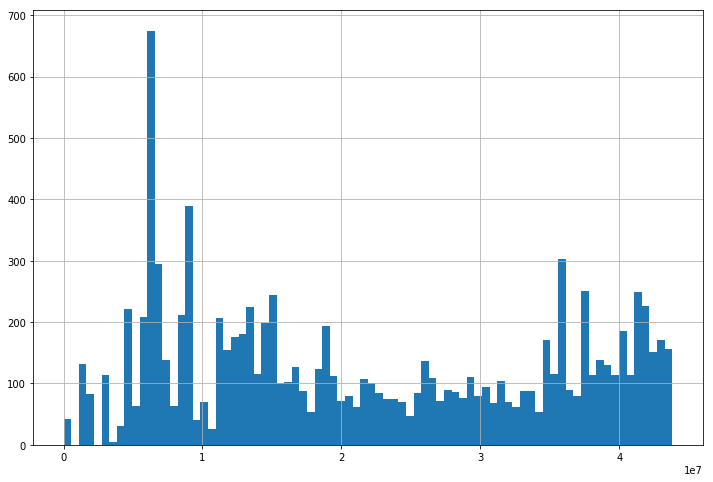

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

#plt.hist(catal['feature_3'][catal['type']== 'movie'], 40, color='blue')

plt.hist(catal['feature_1'], 80)

plt.grid()
plt.show()

In [92]:
timetr.to_csv(os.path.join(DATA_PATH, 'timetr.csv'))

In [81]:
pd.unique(timetr[timetr.minus == 1].element_uid)   #ЭТО СЕРИАЛЫ, в которых выходят новые сезоны. 
#Если пользователь смотрел предыдущий сезон, может посоветовать ему новый?

array([ 5951, 10108,  8420,  5500,  7537,  1565,  6762,  2910,  7106,
        8660,  3782,  3302,   913,  7999,  6866,   430,  2824,  2997,
        2741,  2127,  5724,  1964,  8621,  4243,  6510,  9107,  8594,
        2699,  7993,  4473,  3774,  5822,  8823,  4005,  7222,  6718,
        3473,  4826,   585,  2136], dtype=uint64)

In [93]:
transactions_exp.head()

,Unnamed: 0,Unnamed: 0.1,element_uid,user_uid,watched_time,rating,duration,feature_1,feature_2,feature_3,...,feature_5_-1,feature_5_44,smallf3,middlef3,bigf3,type_m,type_s,type_mm,longfilm,shortfilm
0,0,0,3336,5177,0.792963,9.0,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
1,1,1,3336,349202,0.609444,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
2,2,2,3336,117582,1.060556,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
3,3,3,3336,523833,0.804815,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0
4,4,4,3336,571064,0.845926,NaN,90,4.166108e+07,0.739609,45,...,0,0,0,0,1,1,0,0,0,0


In [2]:
transactions_exp1=transactions_exp
transactions_exp1['worst']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.2 else 0)
transactions_exp1['watched']=transactions_exp1.watched_time.map(lambda x: 0 if x < 0.51 else 1)

In [43]:
transactions_exp1=transactions_exp

In [5]:
Counter(transactions_exp1.worst)

Counter({0: 7304967, 1: 2338045})

In [16]:
transactions_exp1[transactions_exp1.worst == 1]=transactions_exp1[transactions_exp1.worst == 1].fillna(2.0)

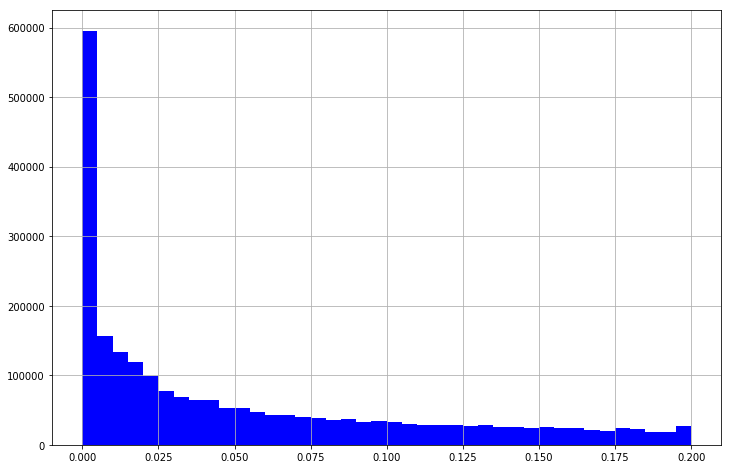

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline
from IPython.display import display
trtr=transactions_exp1[transactions_exp1.worst == 1]

plt.figure(figsize=(12, 8))

plt.hist(trtr['watched_time'], 40, color='blue')


plt.grid()
plt.show()

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


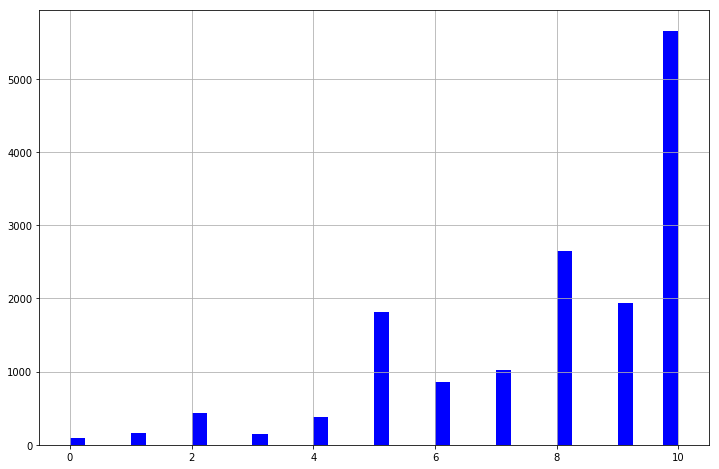

In [8]:
plt.figure(figsize=(12, 8))

plt.hist(trtr['rating'], 40, color='blue')


plt.grid()
plt.show()

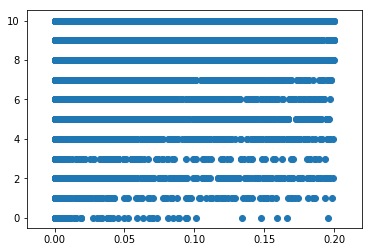

In [7]:
plt.scatter(trtr['watched_time'],
            trtr['rating'])

In [29]:
transactions_exp2=transactions_exp
transactions_exp2['worst']=transactions_exp1.watched_time.map(lambda x:1 if x == 0.05 else 0)


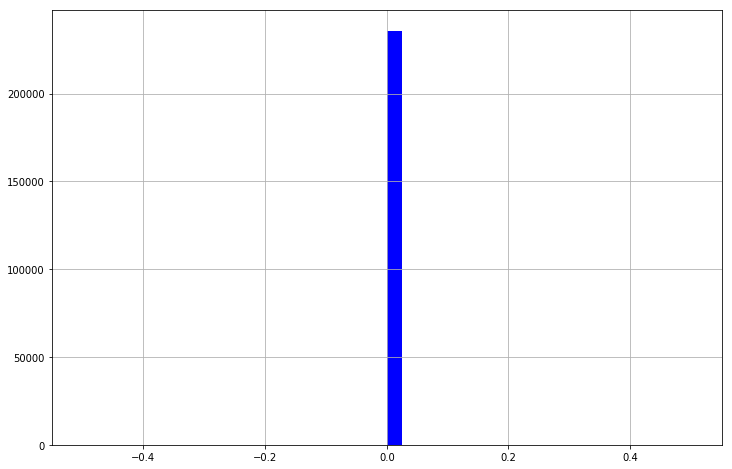

In [18]:

trtr2=transactions_exp2[transactions_exp2.worst == 1]
plt.figure(figsize=(12, 8))

plt.hist(trtr2['watched_time'], 40, color='blue')


plt.grid()
plt.show()

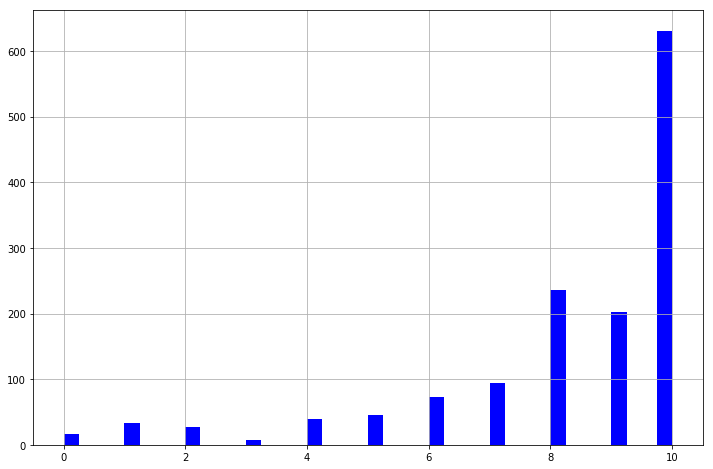

In [22]:
plt.figure(figsize=(12, 8))

plt.hist(trtr2['rating'], 40, color='blue')


plt.grid()
plt.show()

In [30]:
trtr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235856 entries, 73 to 9642989
Data columns (total 32 columns):
Unnamed: 0      235856 non-null int64
Unnamed: 0.1    235856 non-null int64
element_uid     235856 non-null int64
user_uid        235856 non-null int64
watched_time    235856 non-null float64
rating          1406 non-null float64
duration        235856 non-null int64
feature_1       235856 non-null float64
feature_2       235856 non-null float64
feature_3       235856 non-null int64
feature_4       235856 non-null float64
quantity        235856 non-null int64
rating_mean     233313 non-null float64
CM_S            235856 non-null int64
CM_P            235856 non-null int64
CM_R            235856 non-null int64
feature_5_65    235856 non-null int64
feature_5_00    235856 non-null int64
feature_5_68    235856 non-null int64
feature_5_59    235856 non-null int64
feature_5_-1    235856 non-null int64
feature_5_44    235856 non-null int64
smallf3         235856 non-null int64
mid

In [28]:
(trtr2.isnull().sum()/trtr2.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000000
rating          0.994039
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.010782
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
worst           0.000000
watched         0.000000
dtype: float64

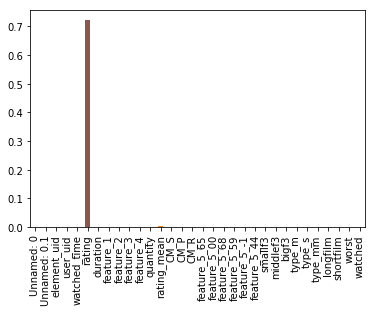

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline
from IPython.display import display
(transactions_exp1.isnull().sum()/transactions_exp1.shape[0]).plot(kind='bar');

In [19]:
transactions_exp1=transactions_exp1.drop(['worst'],1)

In [20]:
transactions_exp1.to_csv(os.path.join(DATA_PATH, 'transactions_exp1.csv'))

In [31]:
transactions_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643012 entries, 0 to 9643011
Data columns (total 32 columns):
Unnamed: 0      int64
Unnamed: 0.1    int64
element_uid     int64
user_uid        int64
watched_time    float64
rating          float64
duration        int64
feature_1       float64
feature_2       float64
feature_3       int64
feature_4       float64
quantity        int64
rating_mean     float64
CM_S            int64
CM_P            int64
CM_R            int64
feature_5_65    int64
feature_5_00    int64
feature_5_68    int64
feature_5_59    int64
feature_5_-1    int64
feature_5_44    int64
smallf3         int64
middlef3        int64
bigf3           int64
type_m          int64
type_s          int64
type_mm         int64
longfilm        int64
shortfilm       int64
worst           int64
watched         int64
dtypes: float64(6), int64(26)
memory usage: 2.3 GB


In [59]:
del transactions_exp
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)

In [60]:
transactions_exp1=transactions_exp
transactions_exp1['5%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.051 and x >0.005 else 0)
transactions_exp1['10%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.101 and x >0.05 else 0)
transactions_exp1['15%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.151 and x >0.10 else 0)
transactions_exp1['20%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.201 and x >0.15 else 0)
transactions_exp1['watched']=transactions_exp1.watched_time.map(lambda x: 0 if x < 0.51 else 1)

transactions_exp2=transactions_exp
transactions_exp2['worst']=transactions_exp2.watched_time.map(lambda x:1 if x < 0.2 and x >0.005 else 0)
transactions_exp2[transactions_exp2.worst == 1]=transactions_exp2[transactions_exp2.worst == 1].fillna(2.0)
transactions_exp2['watched']=transactions_exp2.watched_time.map(lambda x: 0 if x < 0.51 else 1)

transactions_exp3=transactions_exp
transactions_exp3['worst']=transactions_exp3.watched_time.map(lambda x:1 if x < 0.2  and x >0.1 else 0)
transactions_exp3['watched']=transactions_exp3.watched_time.map(lambda x: 0 if x < 0.51 else 1)

transactions_exp4=transactions_exp
transactions_exp4['worst']=transactions_exp4.watched_time.map(lambda x:1 if x < 0.1 and x >0.005 else 0)
transactions_exp4['watched']=transactions_exp4.watched_time.map(lambda x: 0 if x < 0.51 else 1)




In [61]:
transactions_exp1[transactions_exp1['5%'] == 1]=transactions_exp1[transactions_exp1['5%'] == 1].fillna(1.0)
transactions_exp1[transactions_exp1['10%'] == 1]=transactions_exp1[transactions_exp1['10%'] == 1].fillna(2.0)
transactions_exp1[transactions_exp1['15%'] == 1]=transactions_exp1[transactions_exp1['15%'] == 1].fillna(3.0)
transactions_exp1[transactions_exp1['20%'] == 1]=transactions_exp1[transactions_exp1['20%'] == 1].fillna(4.0)        
                                                                   
transactions_exp2[transactions_exp2.worst == 1]=transactions_exp2[transactions_exp2.worst == 1].fillna(2.0)
                                                                   

transactions_exp3[transactions_exp3.worst == 1]=transactions_exp3[transactions_exp3.worst == 1].fillna(2.0)                                                                

transactions_exp4[transactions_exp4.worst == 1]=transactions_exp4[transactions_exp4.worst == 1].fillna(2.0)                                                                   

In [73]:
(transactions_exp.isnull().sum()/transactions_exp.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000374
rating          0.836295
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.004173
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
worst           0.000000
watched         0.000000
dtype: float64

In [74]:
(transactions_exp1.isnull().sum()/transactions_exp1.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000374
rating          0.783314
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.003792
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
5%              0.000000
10%             0.000000
15%             0.000000
20%             0.000000
watched         0.000000
dtype: float64

In [75]:
(transactions_exp2.isnull().sum()/transactions_exp2.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000374
rating          0.784336
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.003801
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
worst           0.000000
watched         0.000000
dtype: float64

In [76]:
(transactions_exp3.isnull().sum()/transactions_exp3.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000374
rating          0.911364
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.005086
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
worst           0.000000
watched         0.000000
dtype: float64

In [77]:
(transactions_exp4.isnull().sum()/transactions_exp4.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000374
rating          0.836295
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.004173
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
worst           0.000000
watched         0.000000
dtype: float64

In [66]:
del transactions_exp
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)

In [68]:
transactions_exp1=transactions_exp
transactions_exp1['5%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.051 and x >0.005 else 0)
transactions_exp1['10%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.101 and x >0.05 else 0)
transactions_exp1['15%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.151 and x >0.10 else 0)
transactions_exp1['20%']=transactions_exp1.watched_time.map(lambda x:1 if x < 0.201 and x >0.15 else 0)
transactions_exp1['watched']=transactions_exp1.watched_time.map(lambda x: 0 if x < 0.51 else 1)

transactions_exp1[transactions_exp1['5%'] == 1]=transactions_exp1[transactions_exp1['5%'] == 1].fillna(1.0)
transactions_exp1[transactions_exp1['10%'] == 1]=transactions_exp1[transactions_exp1['10%'] == 1].fillna(2.0)
transactions_exp1[transactions_exp1['15%'] == 1]=transactions_exp1[transactions_exp1['15%'] == 1].fillna(3.0)
transactions_exp1[transactions_exp1['20%'] == 1]=transactions_exp1[transactions_exp1['20%'] == 1].fillna(4.0)        
             
del transactions_exp


In [69]:
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)
transactions_exp2=transactions_exp
transactions_exp2['worst']=transactions_exp2.watched_time.map(lambda x:1 if x < 0.2 and x >0.005 else 0)
transactions_exp2['watched']=transactions_exp2.watched_time.map(lambda x: 0 if x < 0.51 else 1)

transactions_exp2[transactions_exp2.worst == 1]=transactions_exp2[transactions_exp2.worst == 1].fillna(2.0)
transactions_exp2[23:25]

,Unnamed: 0,Unnamed: 0.1,element_uid,user_uid,watched_time,rating,duration,feature_1,feature_2,feature_3,...,smallf3,middlef3,bigf3,type_m,type_s,type_mm,longfilm,shortfilm,worst,watched
23,23,23,3336,286792,1.000741,NaN,90,4.166108e+07,0.739609,45,...,0,0,1,1,0,0,0,0,0,1
24,24,24,3336,319767,0.043704,2.0,90,4.166108e+07,0.739609,45,...,0,0,1,1,0,0,0,0,1,0


In [71]:
del transactions_exp
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)


transactions_exp3=transactions_exp
transactions_exp3['worst']=transactions_exp3.watched_time.map(lambda x:1 if x < 0.2  and x >0.1 else 0)
transactions_exp3['watched']=transactions_exp3.watched_time.map(lambda x: 0 if x < 0.51 else 1)
transactions_exp3[23:25]

transactions_exp3[transactions_exp3.worst == 1]=transactions_exp3[transactions_exp3.worst == 1].fillna(2.0)                                                                


In [72]:
del transactions_exp
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)

transactions_exp4=transactions_exp
transactions_exp4['worst']=transactions_exp4.watched_time.map(lambda x:1 if x < 0.1 and x >0.005 else 0)
transactions_exp4['watched']=transactions_exp4.watched_time.map(lambda x: 0 if x < 0.51 else 1)

                                                   

transactions_exp4[transactions_exp4.worst == 1]=transactions_exp4[transactions_exp4.worst == 1].fillna(2.0)    


In [78]:
del transactions_exp
transactions_exp = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions_exp.csv'),
    
)

(transactions_exp.isnull().sum()/transactions_exp.shape[0])

Unnamed: 0      0.000000
Unnamed: 0.1    0.000000
element_uid     0.000000
user_uid        0.000000
watched_time    0.000374
rating          0.962943
duration        0.000000
feature_1       0.000000
feature_2       0.000000
feature_3       0.000000
feature_4       0.000000
quantity        0.000000
rating_mean     0.005450
CM_S            0.000000
CM_P            0.000000
CM_R            0.000000
feature_5_65    0.000000
feature_5_00    0.000000
feature_5_68    0.000000
feature_5_59    0.000000
feature_5_-1    0.000000
feature_5_44    0.000000
smallf3         0.000000
middlef3        0.000000
bigf3           0.000000
type_m          0.000000
type_s          0.000000
type_mm         0.000000
longfilm        0.000000
shortfilm       0.000000
dtype: float64

In [ ]:
transactions_exp1.to_csv(os.path.join(DATA_PATH, 'transactions_exp1.csv'))
transactions_exp2.to_csv(os.path.join(DATA_PATH, 'transactions_exp2.csv'))
transactions_exp3.to_csv(os.path.join(DATA_PATH, 'transactions_exp3.csv'))
transactions_exp4.to_csv(os.path.join(DATA_PATH, 'transactions_exp4.csv'))